In [1]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

In [34]:
c1 = SkyCoord('5h23m34.5s', '-69d45m22s', frame='icrs')
c2 = SkyCoord('0h52m44.8s', '-72d49m43s', frame='fk5')
sep = c1.separation(c2)
sep

<Angle 20.74611448 deg>

In [35]:
sep.radian

0.36208800460262563

In [36]:
sep.hour

1.3830742984029318

In [37]:
 sep.arcminute

1244.7668685626384

In [38]:
sep.arcsecond

74686.0121137583

3D Separation Cases

In [39]:
c1 = SkyCoord('5h23m34.5s', '-69d45m22s', distance=70*u.kpc, frame='icrs')
c2 = SkyCoord('0h52m44.8s', '-72d49m43s', distance=80*u.kpc, frame='icrs')
sep = c1.separation_3d(c2)
sep.to(u.km)

<Distance 8.86946799e+17 km>

Position angles

In [43]:
c1 = SkyCoord(1*u.deg, 1*u.deg, frame='icrs')
c2 = SkyCoord(2*u.deg, 2*u.deg, frame='icrs')
c1.position_angle(c2).to(u.deg)

<Angle 44.97818294 deg>

Offset frames

In [9]:
from astropy.coordinates import SkyOffsetFrame, ICRS, SkyCoord

In [50]:
center = ICRS(10*u.deg, 88*u.deg)
print(center)

<ICRS Coordinate: (ra, dec) in deg
    (10., 88.)>


In [51]:
target = ICRS(11*u.deg, 89*u.deg)
print(target)

<ICRS Coordinate: (ra, dec) in deg
    (11., 89.)>


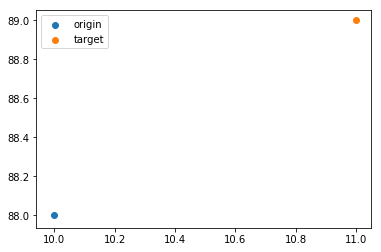

In [52]:
plt.scatter(center.ra, center.dec, label='origin')
plt.scatter(target.ra, target.dec, label='target')
plt.legend()

In [53]:
target_in_center_frame = target.transform_to(SkyOffsetFrame(origin=center))
print(target_in_center_frame)

<SkyOffsetICRS Coordinate (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (10., 88.)>): (lon, lat) in deg
    (0.01745418, 1.00015223)>


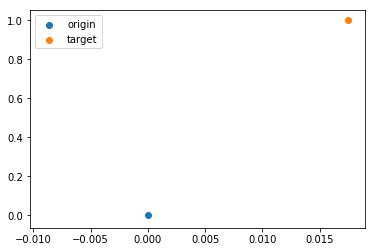

In [54]:
plt.scatter(0,0, label='origin')
plt.scatter(target_in_center_frame.lon, target_in_center_frame.lat, label='target')
plt.legend()

In [55]:
target_in_center_frame.lon

<Longitude 0.01745418 deg>

In [56]:
target_in_center_frame.lat

<Latitude 1.00015223 deg>

Matching to catalogues

Here, ```ra1``` and ```dec1``` are the RAs and DECs of the objects you'd like to match.

And, ```ra2``` and ```dec2``` are the RAs and DECs of the objects in the catalogue you're comaring to.

```c.match_to_catalog_sky()``` is the function that does the heavy lifting for you.

First, let's query some data from SIMBAD.

For more, here's a full list of databases you can query with astropy: https://astroquery.readthedocs.io/en/latest/

In [57]:
from astroquery.simbad import Simbad
from astropy import coordinates

# works only for ICRS coordinates:
c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')
r = 5 * u.arcminute
result_table = Simbad.query_region(c, radius=r)

In [58]:
result_table
# result_table.pprint(show_unit=True, max_width=80, max_lines=5)

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME Ori Region,05 35 17.30,-05 23 28.0,6,6,--,--,0,D,O,
M 42,05 35 17.3,-05 23 28,5,5,7500.000,7500.000,90,D,,1981MNRAS.194..693L
[OW94] 172-327,05 35 17.2210,-05 23 26.542,9,9,--,--,0,C,R,2016ApJ...822...93F
DOH 7 175-328,05 35 17.5,-05 23 28,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 126,05 35 17.11,-05 23 29.3,6,6,--,--,0,D,I,2005AJ....129.1534R
DOH 7 171-327,05 35 17.1,-05 23 27,5,5,--,--,0,D,,2004AJ....127.3456D
MAX 125,05 35 17.11,-05 23 26.6,6,6,--,--,0,D,I,2005AJ....129.1534R
[OW94] 171-326,05 35 17.1,-05 23 26,5,5,--,--,0,D,,2004AJ....127.3456D


Setting up our objects that we'd like to match to:

In [74]:
ra1 = "05h35m17.3s"
dec1 = "-05d23m28s"

ra1 = "05 35 14.82"
dec1 = "-05 18 30.6"

c = SkyCoord(ra=ra1, dec=dec1, unit=(u.deg, u.hourangle))
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (5.58745, -79.6275)>


Setting up the catalouge we're comparing to:

In [75]:
ra2 = result_table['RA']
dec2 = result_table['DEC']

catalog = SkyCoord(ra2, dec2, unit=(u.deg, u.hourangle))
print(len(catalog))

3280


Here's a taste of our catalogue:

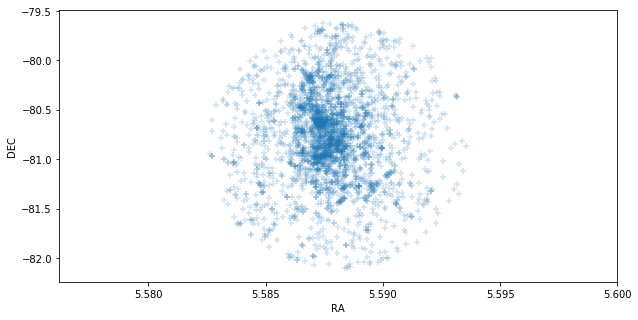

In [86]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.scatter(catalog.ra, catalog.dec, marker='+', alpha=0.2)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

Now to do the matching:

In [87]:
c.match_to_catalog_sky?

In [89]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

Now ```idx``` are indices into catalog that are the closest objects to each of the coordinates in ```c```, ```d2d``` are the on-sky distances between them, and ```d3d``` are the 3-dimensional distances.

In [90]:
idx, d2d, d3d

(array(3277), <Angle [0.] deg>, <Quantity 0.>)

So where is our match?

In [91]:
catalog[idx]

<SkyCoord (ICRS): (ra, dec) in deg
    (5.58745, -79.6275)>

In [81]:
result_table[idx]

# ra1 = "05h35m17.3s"
# dec1 = "-05d23m28s"

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
TKK 486,05 35 14.82,-05 18 30.6,6,6,--,--,0,D,,2003AJ....125.1537T


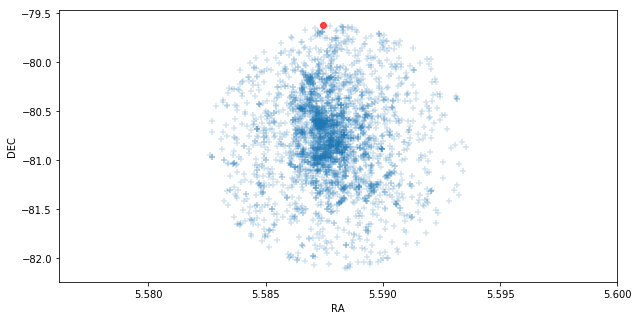

In [93]:
plt.figure(figsize=(10,5))
plt.scatter(catalog.ra, catalog.dec, marker='+', alpha=0.2)
plt.scatter(catalog.ra[idx], catalog.dec[idx], marker='o', c='r',alpha=0.7)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()